# Unit 2.3: Basic Gates and Operations

## Superposition and the Hadamard $H$-Gate

Last week we stated that a qubit can be in the basic states $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ or in a superposition of those states: $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

$$
|+\rangle = |0\rangle + |1\rangle \\
|-\rangle = |0\rangle - |1\rangle
$$

If we apply the *Hadamard* operator, $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, 
to q, $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, 
and then measure the state of tht qubit state we see roughly 50% one or zero.

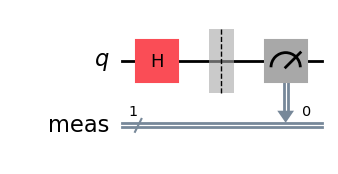

In [2]:
from qiskit import QuantumCircuit
# Create a new circuit with one qubit and add a Hadamard gate to qubit 0
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

Applying the Hadamard operator gives the state:

$$
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
$$

Probabilies are calculated by taking the sum of the squares of the absolute values of the amplitudes, giving a 50% chance of measuring either 0 or 1:

$$
|\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2 = 1
$$

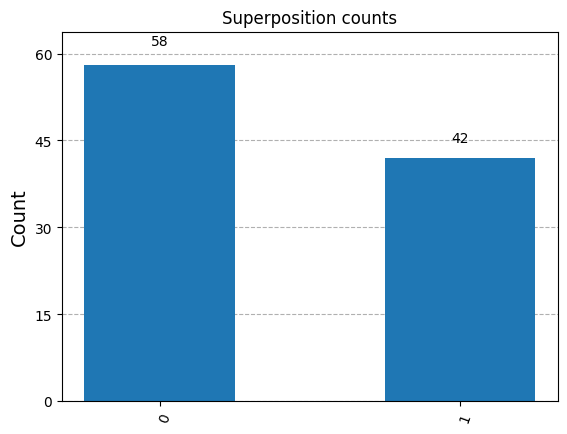

In [3]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
# Transpile for simulator
backend = AerSimulator()
circ = transpile(qc, backend)

# Run and get counts
result = backend.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Superposition counts')

## Flipping a Qubit Phase with the $Z$-Gate

The Z-Gate applies the operation $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$.

Applying the gate to the initial state of $|0\rangle$ we get:

$$  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
    \begin{bmatrix} 1(1) + 0(0) \\ 0(1) + - 1(0) \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle $$

The leaves the Qubit state unchanged.  

Applying the operator to state $|1\rangle$ gives:


$$  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
    \begin{bmatrix} 1(0) + 0(1) \\ 0(0) + - 1(1) \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix}  = - |1\rangle$$

This is the state $|1\rangle$ with the phase flipped.

If we put a Qubit into a superposition, and look at the state before and after the application of the $Z$-Gate,
we can see the rotation by $\pi$ around the $Z$-axis:

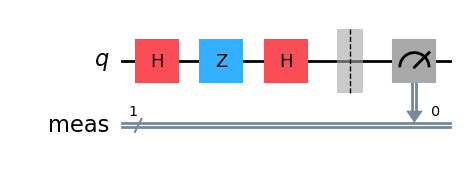

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
# Create a new circuit with one qubit and add a Hadamard gate to qubit 0
qc = QuantumCircuit(1)
qc.h(0)
state1 = Statevector(qc)
qc.z(0)
state2 = Statevector(qc)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

State after applying the $H$-gate, but before applying the $Z$-gate, and then after applying the $Z$-gate:

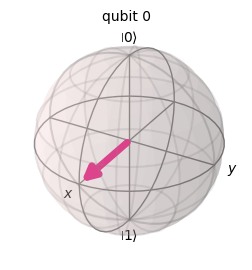

In [31]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state1, figsize=(3,3.5))

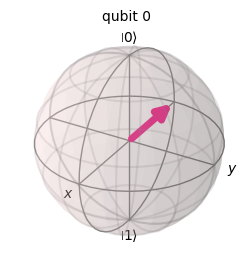

In [32]:
plot_bloch_multivector(state2, figsize=(3,3.5))

And we see that the state is unchanged, as we worked out above.

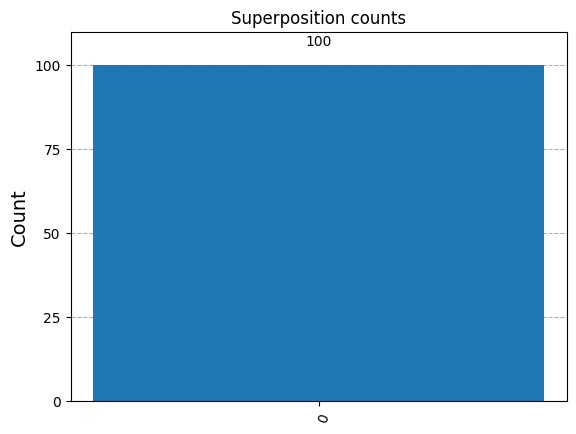

In [8]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
# Transpile for simulator
backend = AerSimulator()
circ = transpile(qc, backend)

# Run and get counts
result = backend.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Superposition counts')

# Two Qubit Gates

## Controlled U1

A Controlled U1 gate is just a gate that implements a single rotation around the Z-axis (phase) of the target qubit 
if the control qubit is 1.

The circuit below is the Quantum Fourier Transform for two qubits.  
It used a Hadamard gate to put q0 in to superposition. 
Then a controlled U1 gate, with a rotation of pi/2, is applied with the target q1. 
After this a Hadamard gate is applied to q1. 
Finally we apply a swap gate to q0 and q1.

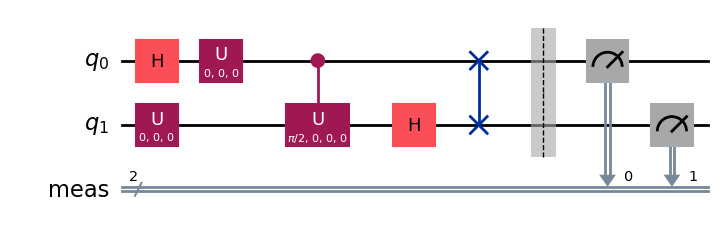

In [ ]:
import math
qc = QuantumCircuit(2)
qc.h(0)
qc.cu(math.pi / 2, 0, 0, 0, control_qubit=0, target_qubit=1)
qc.h(1)
qc.swap(0, 1)
qc.measure_all()
qc.draw("mpl")

## Entanglement and Bell States and the $CNOT$-Gate

John Bell {cite:p} proved that the *spooky action at a distance* that Einstien, Podolsky & Rosen first pointed out, that bell state correlation is stronger that could exist in classical systems.  
Bell's 1964 experiment proved that there was no hidden variable being shared between the entangled qubits.

Measuring one qubit, in an entangled state, instantaneously determines the value of the other.  
From his experiment he showed four unique distinguishable orthogonal entangled states that are often called the Bell states:
($\Phi^+, \Phi^-, \Psi^+, \Psi^-$).

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)  \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}}  (|01\rangle + |10\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}}  (|01\rangle - |10\rangle) 
$$

We also saw a simple circuit with a *Hadamard Gate* and a *Controlled Not (CNOT)* gate.


In [33]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# measure the qubit
#qc.measure_all()
 
noisy_sampler = Sampler(
    options=dict(backend_options=dict())
)
# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(3, AerSimulator())
isa_circuit = pass_manager.run(qc)
pub = (isa_circuit, [0.1] * qc.num_parameters, 100)
job = noisy_sampler.run([pub])
result = job.result()
print(result)
pub_result = result[0]
# Show the histogram
plot_histogram(pub_result.data.meas.get_counts())

# Tell Qiskit how to simulate our circuit
backend = AerSimulator()

from qiskit_ibm_runtime import EstimatorV2 as Estimator
estimator = Estimator(AerSimulator())

# Do the simulation, returning the result
#result = execute(qc,backend, shots=100).result()

#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#isa_circuit = pm.run(qc)
#job = estimator.run([(qc, [0.1] * qc.num_parameters)])
#job_result = job.result()


# get the probability distribution
#counts = job_result.get_counts()

# Show the histogram
#plot_histogram(counts)

PrimitiveResult([SamplerPubResult(data=DataBin(), metadata={'shots': 100, 'circuit_metadata': {}, 'simulator_metadata': {'time_taken_parameter_binding': 6.388e-06, 'time_taken_execute': 0.000505037, 'omp_enabled': True, 'max_gpu_memory_mb': 0, 'max_memory_mb': 19411, 'parallel_experiments': 1}})], metadata={'version': 2})


/home/skingham/miniconda3/envs/py310_ibm-qiskit/lib/python3.10/site-packages/qiskit_aer/primitives/sampler_v2.py:135: UserWarning: The 0-th pub's circuit has no output classical registers and so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(


AttributeError: 'DataBin' object has no attribute 'meas'

In [ ]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

backend = AerSimulator()
# --------------------------
# Simulating using estimator
#---------------------------
from qiskit_aer.primitives import EstimatorV2

psi1 = transpile(RealAmplitudes(num_qubits=2, reps=2), backend, optimization_level=0)
psi2 = transpile(RealAmplitudes(num_qubits=2, reps=3), backend, optimization_level=0)

H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H2 = SparsePauliOp.from_list([("IZ", 1)])
H3 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 1, 2, 3, 5, 8, 13]
theta3 = [1, 2, 3, 4, 5, 6]

estimator = EstimatorV2()

# calculate [ [<psi1(theta1)|H1|psi1(theta1)>,
#              <psi1(theta3)|H3|psi1(theta3)>],
#             [<psi2(theta2)|H2|psi2(theta2)>] ]
job = estimator.run(
    [
        (psi1, [H1, H3], [theta1, theta3]),
        (psi2, H2, theta2)
    ],
    precision=0.01
)
result = job.result()
print(f"expectation values : psi1 = {result[0].data.evs}, psi2 = {result[1].data.evs}")

# --------------------------
# Simulating using sampler
# --------------------------
from qiskit_aer.primitives import SamplerV2
from qiskit import QuantumCircuit

# create a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# create two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc = transpile(pqc, sim, optimization_level=0)
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
pqc2 = transpile(pqc2, sim, optimization_level=0)

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]

# initialization of the sampler
sampler = SamplerV2()

# collect 128 shots from the Bell circuit
job = sampler.run([bell], shots=128)
job_result = job.result()
print(f"counts for Bell circuit : {job_result[0].data.meas.get_counts()}")
 
# run a sampler job on the parameterized circuits
job2 = sampler.run([(pqc, theta1), (pqc2, theta2)])
job_result = job2.result()
print(f"counts for parameterized circuit : {job_result[0].data.meas.get_counts()}")

# --------------------------------------------------
# Simulating with noise model from actual hardware
# --------------------------------------------------
#from qiskit_ibm_runtime import QiskitRuntimeService
#provider = QiskitRuntimeService(channel='ibm_quantum', token="set your own token here")
#backend = provider.get_backend("ibm_kyoto")

# create sampler from the actual backend
#sampler = SamplerV2.from_backend(backend)

# run a sampler job on the parameterized circuits with noise model of the actual hardware
#bell_t = transpile(bell, AerSimulator(basis_gates=["ecr", "id", "rz", "sx"]), optimization_level=0)
#job3 = sampler.run([bell_t], shots=128)
#job_result = job3.result()
#print(f"counts for Bell circuit w/noise: {job_result[0].data.meas.get_counts()}")


expectation values : psi1 = [ 1.55902981 -1.0961936 ], psi2 = 0.18080505686227172
counts for Bell circuit : {'11': 72, '00': 56}
counts for parameterized circuit : {'11': 424, '01': 377, '00': 139, '10': 84}


In [ ]:
from qiskit import QuantumCircuit, execute, Aer

from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = FakeAlmadenV2()



# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply the Hadamard gate
qc.h(0)

# measure the qubit
qc.measure_all()

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=100).result()

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

ImportError: cannot import name 'execute' from 'qiskit' (/Users/skingham/Library/Anaconda/envs/py313_ibm_qiskit/lib/python3.13/site-packages/qiskit/__init__.py)

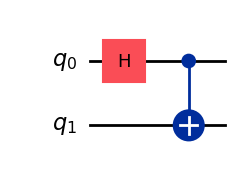

In [ ]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.draw("mpl")

https://www.nature.com/articles/s41566-024-01403-4
 
https://www.quixquantum.com/products/special-purpose-quantum-computer
 
https://opg.optica.org/optica/fulltext.cfm?uri=optica-4-1-8&id=356755
 
https://arxiv.org/pdf/2408.08138

https://www.cl.cam.ac.uk/teaching/1920/QuantComp/Quantum_Computing_Lecture_2.pdf
https://web.eecs.utk.edu/~bmaclenn/Classes/494-594-UC-F13/handouts/LNUC-III.A.pdf
http://www.macs.hw.ac.uk/~des/qcnotesaims17.pdf
https://web.eecs.utk.edu/~bmaclenn/Classes/494-594-UC-F13/handouts/LNUC-III.A.pdf
https://www.intoquantum.pub/p/all-the-math-that-you-need-to-start-312
https://kakashi007.medium.com/maths-for-quantum-computing-a-brief-introduction-of-quantum-computing-part-2-4322c1ab140d
https://www.henryyuen.net/fall2019/scribe1-2.pdf
https://people.eecs.berkeley.edu/~vazirani/s09quantum/notes/lecture2.pdf
https://dc.ewu.edu/cgi/viewcontent.cgi?params=/context/theses/article/1035/&path_info=Ryan_Downie_Final_Thesis_Spring_2012.pdf

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
 
# observable(s) whose expected values you want to compute
from qiskit.quantum_info import SparsePauliOp
observable = SparsePauliOp(["II", "XX", "YY", "ZZ"], coeffs=[1, 1, -1, 1])
 
# value(s) for the circuit parameter(s)
parameter_values = [] #[[0], [np.pi/6], [np.pi/2]]

# Generate a pass manager without providing a backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1)
isa_circuit = pm.run(qc)
isa_observable = observable.apply_layout(isa_circuit.layout)

from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

job = estimator.run([(isa_circuit, isa_observable, parameter_values)])
result = job.result()
print(f" > Result class: {type(result)}")
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>
 > Expectation value: 3.999999999999999
 > Metadata: {'target_precision': 0.0, 'circuit_metadata': {}}
